# Authors UB

In [1]:
import utils
import pandas as pd
import numpy as np

c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alba.garcia.romo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df_authors = pd.read_pickle("df_authors_embeddings_UB_2024.pkl")
print(df_authors)

                       author  \
0                   A Bellido   
1                    A Bernal   
2               A Boncompagni   
3           A Bueno Sacristán   
4           A Camacho-Mourelo   
...                       ...   
29206        Тамара Меркулова   
29207  ‪Aurelio Gómez‐Cadenas   
29208          ‪Damià Barceló   
29209        ‪Frederic Blanc‬   
29210       ‪Moreah Zisquit‬‏   

                                       mean_embedding_st  \
0      [0.0064475536, -0.019288462, -0.012821997, 0.0...   
1      [0.017124277, -0.029842686, 0.019449174, -0.13...   
2      [0.05566208, 0.06350061, -0.0042934883, -0.019...   
3      [0.007591753, -0.048422676, 0.08512019, 0.0206...   
4      [0.015227947, 0.015521203, -0.07570645, -0.071...   
...                                                  ...   
29206  [0.024130033, 0.0064244163, -0.0013336926, -0....   
29207  [0.07333158, -0.004593403, 0.035901148, -0.038...   
29208  [0.0153780235, -0.03383159, 0.008512039, 0.011...   
292

In [3]:
# load works data to recompute UMAP for works

df_works = pd.read_parquet(r"01. data\df_works_UB_2024_with_embeddings.parquet")
print(df_works)

                                              Work Name  Publication Year  \
0                            Review of Particle Physics              2024   
1     A biological definition of neuronal α-synuclei...              2024   
2     GWTC-2.1: Deep extended catalog of compact bin...              2024   
3         Robustness and resilience of complex networks              2024   
4         The search for neutrinoless double-beta decay              2024   
...                                                 ...               ...   
7873  Inkjet Printed Perovskite LEDs: Approaches, Li...              2024   
7874  Inkjet-printed FASnI3 photodetectors for flexi...              2024   
7875  Effect of annealing temperature on the propert...              2024   
7876  Nickel-manganese based anodes for efficient el...              2024   
7877  OR30-01 Brown Adipose Tissue as an Endocrine O...              2024   

                                                Authors  \
0     S. Navas, 

In [84]:
# we also need to retrive the reducer model to apply the same to the mean author embeddings

import umap.umap_ as umap

def create_data_map(n_neighbors, min_dist, embeddings):
    reducer = umap.UMAP(n_components=2, n_neighbors=n_neighbors, min_dist=min_dist, random_state=42) # default n_neighbors = 15, min_dist=0.1
    data_map = reducer.fit_transform(embeddings)
    #print(data_map)
    # Save data
    np.save("openalex_data_map.npy", data_map)
    return reducer, data_map

In [ ]:
# Nomic WORK embeddings
works_embeddings_nomic = np.stack(df_works['embeddings_nomic'].values)
works_reducer_nomic, works_data_map_nomic = create_data_map(n_neighbors=15, min_dist=0.1, embeddings=works_embeddings_nomic)

# ST WORK embeddings
works_embeddings_st = np.stack(df_works['embeddings_st'].values)
works_reducer_st, works_data_map_nst = create_data_map(n_neighbors=15, min_dist=0.1, embeddings=works_embeddings_st)

# SPECTER WORK embeddings
works_embeddings_specter = np.stack(df_works['embeddings_specter'].values)
works_reducer_specter, works_data_map_specter = create_data_map(n_neighbors=15, min_dist=0.1, embeddings=works_embeddings_specter)


c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
Exception ignored on calling ctypes callback function <function ExecutionEngine._raw_object_cache_notify at 0x000001FACD2979C0>:
Traceback (most recent call last):
  File "c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\llvmlite\binding\executionengine.py", line 178, in _raw_object_cache_notify
    def _raw_object_cache_notify(self, data):
KeyboardInterrupt: 


In [ ]:
# apply each reducer to AUTHOR embeddigns

authors_embeddings_nomic = np.stack(df_authors['mean_embedding_nomic'].values)
authors_data_map_nomic = works_reducer_nomic.transform(authors_embeddings_nomic)
print(authors_data_map_nomic)

authors_embeddings_st = np.stack(df_authors['mean_embedding_st'].values)
authors_data_map_st = works_reducer_st.transform(authors_embeddings_st)
print(authors_data_map_st)

authors_embeddings_specter = np.stack(df_authors['mean_embedding_specter'].values)
authors_data_map_specter = works_reducer_specter.transform(authors_embeddings_specter)
print(authors_data_map_specter)

c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[[ 8.594854   4.513579 ]
 [10.862413   1.6007501]
 [ 8.675152   4.1442175]
 ...
 [ 8.002877  -0.7048023]
 [ 7.103093   2.9963617]
 [ 5.9564276  1.8029251]]


c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[[-2.6179123   4.9070024 ]
 [ 0.19129153  7.353624  ]
 [-2.5429797   6.003964  ]
 ...
 [ 5.9376225   3.4065428 ]
 [-0.41075495  3.701282  ]
 [ 1.2196661   2.1418035 ]]


c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[[14.295029    1.3692317 ]
 [10.537104    0.05939716]
 [13.855988    1.1963931 ]
 ...
 [ 7.565806    5.728471  ]
 [10.245189    3.5983164 ]
 [12.748256    5.4767466 ]]


In [ ]:
utils.save_coordinates(df_authors, authors_data_map_nomic, 'authors_nomic')
utils.save_coordinates(df_authors, authors_data_map_st, 'authors_st')
utils.save_coordinates(df_authors, authors_data_map_specter, 'authors_specter')

      author                                  mean_embedding_st  \
0  A Bellido  [0.0064475536, -0.019288462, -0.012821997, 0.0...   
1   A Bernal  [0.017124277, -0.029842686, 0.019449174, -0.13...   

                                mean_embedding_nomic  \
0  [0.030011391, 0.01821812, -0.03136764, -0.0002...   
1  [-0.01001405, 0.013115305, -0.0035099105, 0.01...   

                              mean_embedding_specter  num_papers  paper_count  \
0  [0.4418743699789047, 0.7585759311914444, -0.53...           2            2   
1  [0.7639488577842712, 1.4350043535232544, -0.28...           1            1   

   x_authors_st  y_authors_st  x_authors_nomic  y_authors_nomic  \
0      2.675834     -5.112846         8.594854         4.513579   
1     -5.176495     10.573017        10.862413         1.600750   

   x_authors_specter  y_authors_specter  
0           2.641869          10.010655  
1           8.020308           3.258647  
(29211, 12)
      author                                 

In [ ]:
df_authors.to_pickle("df_authors_embeddings_UB_2024.pkl")

## Visualization

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def compute_cluster_spread(df, x_col, y_col, x_col_auth, y_col_auth, label_col='Domain', plot=True, author_centroids=None):
    """
    For each unique label in `label_col`, compute:
    - the centroid of points in UMAP space (`x_col`, `y_col`)
    - average distance of points from their centroid (spread)
    - standard deviation of distances
    Optionally, plot clusters with centroids and author centroids.
    """
    domain_colors = {
        'physical sciences': '#2ca02c',  # green
        'health sciences': '#9467bd',    # purple
        'life sciences': '#1f77b4',      # blue
        'social sciences': '#d62728',    # red
        'unknown': '#ff7f0e'             # orange
    }

    results = []
    for label in df[label_col].dropna().unique():
        group = df[df[label_col] == label]
        coords = group[[x_col, y_col]].values
        if len(coords) < 2:
            continue  # Skip small clusters

        centroid = coords.mean(axis=0)
        dists = np.linalg.norm(coords - centroid, axis=1)
        avg_dist = dists.mean()
        std_dev = dists.std()

        results.append({
            'label': label,
            'count': len(coords),
            'centroid_x': centroid[0],
            'centroid_y': centroid[1],
            'avg_dist': avg_dist,
            'std_dev': std_dev
        })

        if plot:
            c = domain_colors.get(label.lower(), 'gray')
            plt.scatter(coords[:, 0], coords[:, 1], s=10, label=label, alpha=0.4, color=c)
            plt.scatter(*centroid, c='black', s=50, marker='x')
            plt.text(centroid[0], centroid[1], label, fontsize=8, ha='center', va='center', color='black')

    if plot:
        # Plot author centroids if provided
        if author_centroids is not None:
            plt.scatter(
                author_centroids[x_col_auth],
                author_centroids[y_col_auth],
                s=5,
                c='black',
                marker='*',
                label='Author Centroids'
            )

        plt.title(f"UMAP clusters by {label_col}")
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
        plt.axis('off')
        plt.tight_layout()
        plt.show()

    return pd.DataFrame(results).sort_values(by='avg_dist')


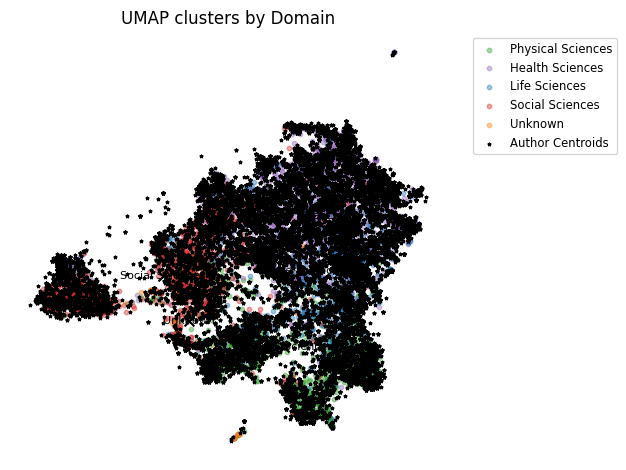

label  count  centroid_x  centroid_y  avg_dist   std_dev
4            Unknown     62    5.264532   -1.252416  2.163936  1.378552
3    Social Sciences   1534    4.489965    0.286869  2.179875  1.102126
1    Health Sciences   3250    8.646315    2.317088  2.315242  1.538792
2      Life Sciences   1140    8.866915    0.456576  2.324013  1.267118
0  Physical Sciences   1892    8.129327   -2.111644  2.361315  1.302190

In [ ]:
compute_cluster_spread(
    df=df_works,
    x_col='x_nomic',
    y_col='y_nomic',
    x_col_auth='x_authors_nomic',
    y_col_auth='y_authors_nomic',
    label_col='Domain',
    plot=True,
    author_centroids=df_authors
)


### Only with top authors

Authors with more than 5 papers?

                       author  \
0                   A Bellido   
11                  A Fidanza   
16              A M Corraliza   
17            A M Torres-Vega   
19            A Modolell Roig   
...                       ...   
29196         Е. В. Москалева   
29199           Л. В. Рычкова   
29204          Олена Ніфатова   
29205  Павел В. Дороватовский   
29206        Тамара Меркулова   

                                       mean_embedding_st  \
0      [0.0064475536, -0.019288462, -0.012821997, 0.0...   
11     [-0.061237063, 0.0018071245, -0.011582979, -0....   
16     [-0.010763167, -0.09225464, 0.032151803, 0.041...   
17     [0.08124082, 0.034702785, 0.023208998, -0.0253...   
19     [0.015940854, -0.054689728, 0.052589893, -0.05...   
...                                                  ...   
29196  [0.009580461, 0.041405447, -0.040330254, 0.022...   
29199  [0.009580461, 0.041405447, -0.040330254, 0.022...   
29204  [0.03720491, -0.007326711, -0.008390757, -0.01...   
292

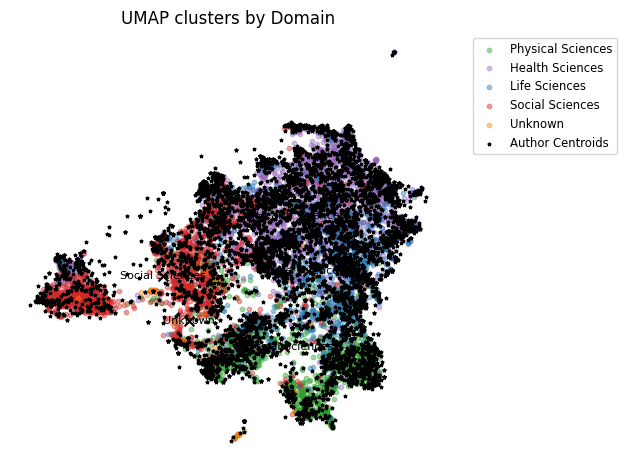

label  count  centroid_x  centroid_y  avg_dist   std_dev
4            Unknown     62    5.264532   -1.252416  2.163936  1.378552
3    Social Sciences   1534    4.489965    0.286869  2.179875  1.102126
1    Health Sciences   3250    8.646315    2.317088  2.315242  1.538792
2      Life Sciences   1140    8.866915    0.456576  2.324013  1.267118
0  Physical Sciences   1892    8.129327   -2.111644  2.361315  1.302190

In [ ]:
major_authors = df_authors[df_authors['paper_count'] >= 2]
print(major_authors)

compute_cluster_spread(
    df=df_works,
    x_col='x_nomic',
    y_col='y_nomic',
    x_col_auth='x_authors_nomic',
    y_col_auth='y_authors_nomic',
    label_col='Domain',
    plot=True,
    author_centroids=major_authors
)


# Authors Utrecht

In [ ]:
df_authors_utrecht = pd.read_parquet("df_author_embeddings_Utrecht_2024.parquet")
print(df_authors_utrecht)

                   author                              mean_embeddings_nomic  \
0      A B M Rijkenhuizen  [-0.0064158333, 0.02790583, -0.0097480975, -0....   
1            A Bernasconi  [-0.0045420723, 0.015402608, -0.025891326, -0....   
2         A Hedvig Arnamo  [0.0026844738, -0.027573867, -0.009876751, -0....   
3                  A Hill  [0.007516788, 0.017663507, -0.0282996, -0.0014...   
4                 A Jurke  [0.0196273, -0.036442235, -0.025137855, -0.038...   
...                   ...                                                ...   
26521     Елизавета Сивак  [-0.031283285, 0.053455167, -0.032539245, -0.0...   
26522    Оlga V. Safonova  [0.040794615, 0.068605915, -0.0050922553, -0.0...   
26523      Т. Е. Морозова  [0.0010946129, -0.036175147, -0.024671901, -0....   
26524     Ṣẹ̀yẹ Abímbọ́lá  [0.037911247, 0.010531769, -0.02444223, -0.046...   
26525        ‎Berend Snel  [-0.006326682, 0.01977542, -0.025662798, -0.00...   

       num_papers  x_authors_nomic  y_a

In [5]:
# load works data to recompute UMAP for works

df_works_utrecht = pd.read_parquet(r"df_works_Utrecht_2024_with_embeddings.parquet")
print(df_works_utrecht)

                                              Work Name  Publication Year  \
0     Minimal information for studies of extracellul...              2024   
1     TRIPOD+AI statement: updated guidance for repo...              2024   
2            Maslach Burnout Inventory – General Survey              2024   
3     Maddison‐style estimates of the evolution of t...              2024   
4      Critical transitions in the Amazon forest system              2024   
...                                                 ...               ...   
7266  Postsecular Italy: Transnational and Interdisc...              2024   
7267                             Aan alle goede dingen…              2024   
7268               Love and the natural order of things              2024   
7269  Open uitnodiging om oudere, moderne en contemp...              2024   
7270                      Een terugblik op de MVN-reeks              2024   

                                                Authors  \
0     Joshua A W

In [ ]:
# Nomic WORK embeddings - only nomic in this case!!!
works_embeddings_utrecht = np.stack(df_works_utrecht['embeddings_nomic'].values)
works_reducer_utrecht, works_data_map_utrecht = create_data_map(n_neighbors=15, min_dist=0.1, embeddings=works_embeddings_utrecht)

c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
# apply each reducer to AUTHOR embeddigns - only nomic in this case

authors_embeddings_utrecht = np.stack(df_authors_utrecht['mean_embeddings_nomic'].values)
authors_data_map_utrecht = works_reducer_utrecht.transform(authors_embeddings_utrecht)
print(authors_data_map_utrecht)


c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[[ 2.3963342  -1.139994  ]
 [-2.3395522   0.88258153]
 [ 0.6896337  -0.38707346]
 ...
 [-0.30578044  1.5949731 ]
 [-2.3763444   1.3732349 ]
 [ 1.9778177   1.650284  ]]


In [ ]:
# apply reducer from UB -> apply UB UMAP to utrecht embeddings to have everything in the same space

authors_embeddings_utrecht_2 = np.stack(df_authors_utrecht['mean_embeddings_nomic'].values)
authors_data_map_utrecht_2 = works_reducer_nomic.transform(authors_embeddings_utrecht_2)
print(authors_data_map_utrecht_2)

c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[[ 9.778154   4.0231752]
 [ 6.3311     1.8310201]
 [10.3040905  2.30754  ]
 ...
 [10.886599   3.3287537]
 [ 6.9802837  0.7437345]
 [ 8.531586  -0.7853715]]


In [ ]:
utils.save_coordinates(df_authors_utrecht, authors_data_map_utrecht_2, 'authors_nomic_UB')

               author                              mean_embeddings_nomic  \
0  A B M Rijkenhuizen  [-0.0064158333, 0.02790583, -0.0097480975, -0....   
1        A Bernasconi  [-0.0045420723, 0.015402608, -0.025891326, -0....   

   num_papers  x_authors_nomic  y_authors_nomic             Domain  \
0           1         2.396334        -1.139994  [Health Sciences]   
1           1        -2.339552         0.882582  [Health Sciences]   

   num_domains  x_authors_nomic_UB  y_authors_nomic_UB  
0            1            9.778154            4.023175  
1            1            6.331100            1.831020  
(26526, 9)


In [ ]:
print(df_authors_utrecht)

                   author                              mean_embeddings_nomic  \
0      A B M Rijkenhuizen  [-0.0064158333, 0.02790583, -0.0097480975, -0....   
1            A Bernasconi  [-0.0045420723, 0.015402608, -0.025891326, -0....   
2         A Hedvig Arnamo  [0.0026844738, -0.027573867, -0.009876751, -0....   
3                  A Hill  [0.007516788, 0.017663507, -0.0282996, -0.0014...   
4                 A Jurke  [0.0196273, -0.036442235, -0.025137855, -0.038...   
...                   ...                                                ...   
26521     Елизавета Сивак  [-0.031283285, 0.053455167, -0.032539245, -0.0...   
26522    Оlga V. Safonova  [0.040794615, 0.068605915, -0.0050922553, -0.0...   
26523      Т. Е. Морозова  [0.0010946129, -0.036175147, -0.024671901, -0....   
26524     Ṣẹ̀yẹ Abímbọ́lá  [0.037911247, 0.010531769, -0.02444223, -0.046...   
26525        ‎Berend Snel  [-0.006326682, 0.01977542, -0.025662798, -0.00...   

       num_papers  x_authors_nomic  y_a

In [ ]:
df_authors_utrecht.to_parquet("df_author_embeddings_Utrecht_2024.parquet")

## Visualization

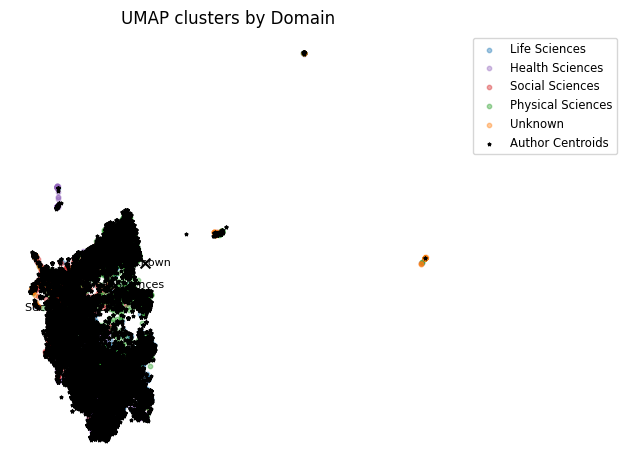

label  count  centroid_x  centroid_y  avg_dist   std_dev
2    Social Sciences   1749   -2.760753    3.793545  1.737761  1.082394
1    Health Sciences   1911   -0.500032    0.650801  2.252974  2.400269
0      Life Sciences   1143    0.800944    1.499932  2.258352  1.813228
3  Physical Sciences   2337    0.542225    4.819647  2.534058  1.856312
4            Unknown    131    2.594286    5.815740  9.116803  4.984490

In [ ]:
compute_cluster_spread(
    df=df_works_utrecht,
    x_col='x_nomic',
    y_col='y_nomic',
    x_col_auth='x_authors_nomic',
    y_col_auth='y_authors_nomic',
    label_col='Domain',
    plot=True,
    author_centroids=df_authors_utrecht
)


In [ ]:
# filter out "outliers" -> paper on the far right

df_works_utrecht_filtered = df_works_utrecht[df_works_utrecht['x_nomic'] <= 7.337]
print(df_works_utrecht.shape)
print(df_works_utrecht_filtered.shape)

df_authors_utrecht_filtered = df_authors_utrecht[df_authors_utrecht['x_authors_nomic'] <= 7.337]
print(df_authors_utrecht.shape)
print(df_authors_utrecht_filtered.shape)

(7271, 11)
(7141, 11)
(26526, 5)
(26375, 5)


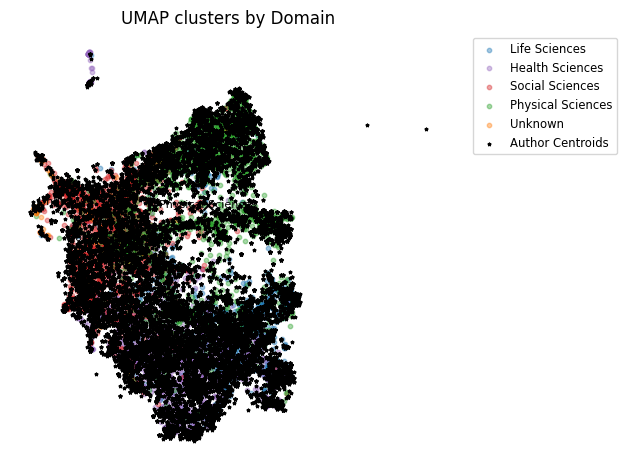

label  count  centroid_x  centroid_y  avg_dist   std_dev
4            Unknown     84   -4.289124    4.863854  1.496211  1.027337
2    Social Sciences   1745   -2.784392    3.785744  1.715573  0.993413
1    Health Sciences   1888   -0.663346    0.493456  2.012160  1.547535
0      Life Sciences   1137    0.704189    1.459618  2.166672  1.208184
3  Physical Sciences   2287    0.316024    4.746217  2.351158  1.063435

In [ ]:
compute_cluster_spread(
    df=df_works_utrecht_filtered,
    x_col='x_nomic',
    y_col='y_nomic',
    x_col_auth='x_authors_nomic',
    y_col_auth='y_authors_nomic',
    label_col='Domain',
    plot=True,
    author_centroids=df_authors_utrecht_filtered
)

### Only with top authors

Authors with more than 5 papers?

                author                              mean_embeddings_nomic  \
17         A. Alkhalaf  [0.022665123, 0.037761517, -0.0077096964, -0.0...   
22          A. Bannink  [0.031666525, 0.031195488, -0.020816188, -0.01...   
23        A. Barnaveli  [0.009858067, 0.03802248, -0.02505239, -0.0300...   
24           A. Barnes  [-0.00498482, -0.00086971815, -0.012363116, -0...   
25           A. Berger  [0.054518223, 0.024166353, -0.021233484, -0.05...   
...                ...                                                ...   
26504       Şakir Akın  [0.0023757692, 0.036510456, -0.027822044, 0.00...   
26507  Šimon Kucharský  [-0.024616307, 0.044199437, -0.027916256, -0.0...   
26518       Анна Шварц  [0.010137432, 0.016850127, -0.03141724, -0.028...   
26519  Димитра Пантели  [-0.011645367, 0.04175558, -0.01939514, -0.020...   
26525     ‎Berend Snel  [-0.006326682, 0.01977542, -0.025662798, -0.00...   

       num_papers  x_authors_nomic  y_authors_nomic  
17              2    

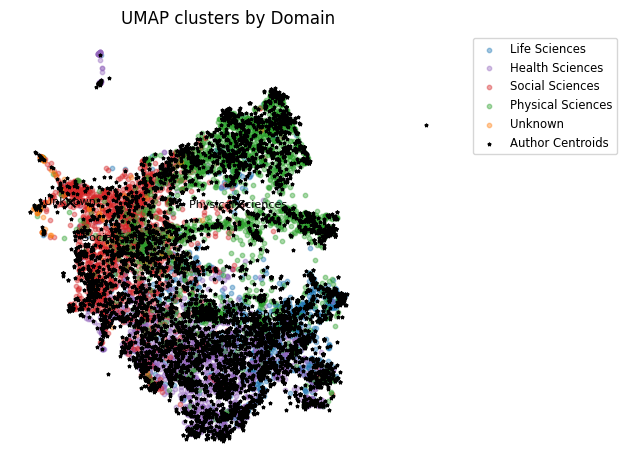

label  count  centroid_x  centroid_y  avg_dist   std_dev
4            Unknown     84   -4.289124    4.863854  1.496211  1.027337
2    Social Sciences   1745   -2.784392    3.785744  1.715573  0.993413
1    Health Sciences   1888   -0.663346    0.493456  2.012160  1.547535
0      Life Sciences   1137    0.704189    1.459618  2.166672  1.208184
3  Physical Sciences   2287    0.316024    4.746217  2.351158  1.063435

In [ ]:
major_authors = df_authors_utrecht_filtered[df_authors_utrecht_filtered['num_papers'] >= 2]
print(major_authors)

compute_cluster_spread(
    df=df_works_utrecht_filtered,
    x_col='x_nomic',
    y_col='y_nomic',
    x_col_auth='x_authors_nomic',
    y_col_auth='y_authors_nomic',
    label_col='Domain',
    plot=True,
    author_centroids=major_authors
)


# Enrich joint visualization

### UB data

In [ ]:
df_authors_exploded = pd.read_pickle("df_exploded_authors_UB_2024.pkl")
print(df_authors_exploded.head(5))

                                       Work Name  Publication Year  \
3  Robustness and resilience of complex networks              2024   
3  Robustness and resilience of complex networks              2024   
3  Robustness and resilience of complex networks              2024   
3  Robustness and resilience of complex networks              2024   
3  Robustness and resilience of complex networks              2024   

                                             Authors  \
3  Oriol Artime, Marco Grassia, Manlio De Domenic...   
3  Oriol Artime, Marco Grassia, Manlio De Domenic...   
3  Oriol Artime, Marco Grassia, Manlio De Domenic...   
3  Oriol Artime, Marco Grassia, Manlio De Domenic...   
3  Oriol Artime, Marco Grassia, Manlio De Domenic...   

                       Primary Topic                     Subfield  \
3  Ecosystem dynamics and resilience  Global and Planetary Change   
3  Ecosystem dynamics and resilience  Global and Planetary Change   
3  Ecosystem dynamics and resilienc

In [ ]:
# Step 1: Join df_authors with df_exploded on the 'author' column
df_merged = df_authors.merge(df_authors_exploded[['author', 'Domain']], on='author', how='left')
#print(df_merged)
# Step 2: Group by author and aggregate the list of unique domains
df_author_domains = df_merged.groupby('author')['Domain'].apply(
    lambda x: sorted(set(x.dropna()))
).reset_index()

# Step 3: Merge the aggregated domains back into df_authors
df_authors = df_authors.merge(df_author_domains, on='author', how='left')

print(df_authors)


                       author  \
0                   A Bellido   
1                   A Bellido   
2                    A Bernal   
3               A Boncompagni   
4           A Bueno Sacristán   
...                       ...   
47793        Тамара Меркулова   
47794  ‪Aurelio Gómez‐Cadenas   
47795          ‪Damià Barceló   
47796        ‪Frederic Blanc‬   
47797       ‪Moreah Zisquit‬‏   

                                       mean_embedding_st  \
0      [0.0064475536, -0.019288462, -0.012821997, 0.0...   
1      [0.0064475536, -0.019288462, -0.012821997, 0.0...   
2      [0.017124277, -0.029842686, 0.019449174, -0.13...   
3      [0.05566208, 0.06350061, -0.0042934883, -0.019...   
4      [0.007591753, -0.048422676, 0.08512019, 0.0206...   
...                                                  ...   
47793  [0.024130033, 0.0064244163, -0.0013336926, -0....   
47794  [0.07333158, -0.004593403, 0.035901148, -0.038...   
47795  [0.0153780235, -0.03383159, 0.008512039, 0.011...   
477

In [ ]:
# Filter authors with more than one domain
authors_multiple_domains = df_authors[df_authors['Domain'].apply(lambda x: isinstance(x, list) and len(x) > 2)]
print(authors_multiple_domains.shape)
print(authors_multiple_domains)

(315, 13)
                       author  \
75                A. Combalía   
108               A. Herreros   
200                A. Sendrós   
401    Adriana García‐Herrera   
427              Adrià Arboix   
...                       ...   
28983    Álvaro Pascual‐Leone   
29034       Ángela Domı́nguez   
29062        Ãngel Carracedo   
29152             Óscar Núñez   
29193     Анна В. Вологжанина   

                                       mean_embedding_st  \
75     [0.017891878, 0.0371841, -0.019955909, -0.0326...   
108    [0.03637008, -0.017797966, -0.0033794409, -0.0...   
200    [0.008844074, 0.016227713, 0.051185116, -0.012...   
401    [0.021601802, -0.020344425, 0.021842029, 0.001...   
427    [-0.0074162423, -0.05585719, 0.020072784, 0.02...   
...                                                  ...   
28983  [0.06673558, -0.035396077, 0.029645752, 0.0394...   
29034  [0.050510574, 0.013645917, 0.007381229, -0.001...   
29062  [0.03462249, -0.023708705, -0.016219055, 0.007

In [ ]:
df_authors['num_domains'] = df_authors['Domain'].apply(lambda x: len(x) if isinstance(x, list) else 0)

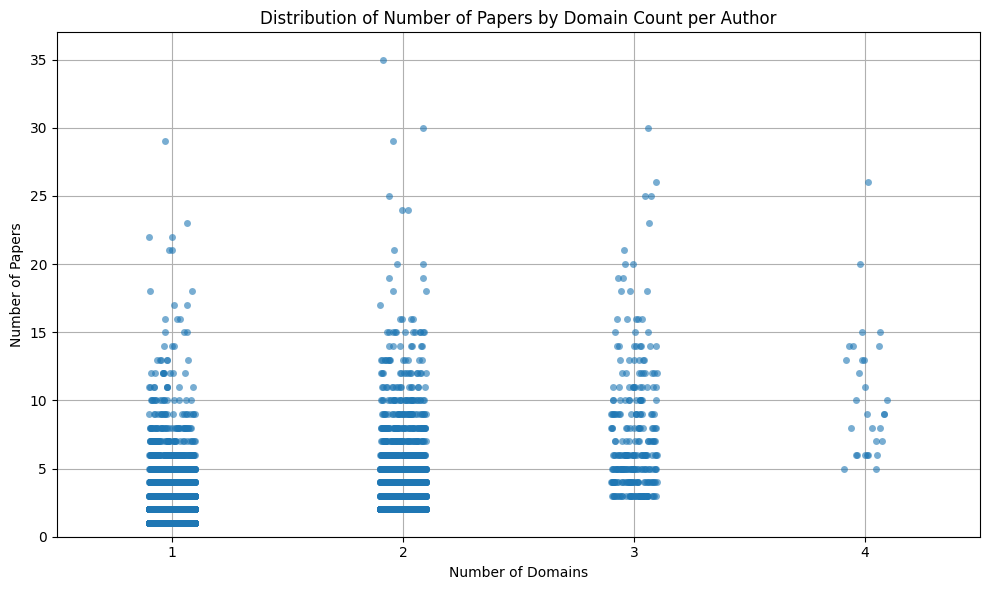

In [ ]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='num_domains', y='num_papers', data=df_authors, jitter=True, alpha=0.6)

plt.title('Distribution of Number of Papers by Domain Count per Author')
plt.xlabel('Number of Domains')
plt.ylabel('Number of Papers')
plt.ylim(0, 37)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\alba.garcia.romo\AppData\Local\Temp\ipykernel_6404\2176011979.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='num_domains', y='num_papers', data=avg_papers, palette='Blues_d')


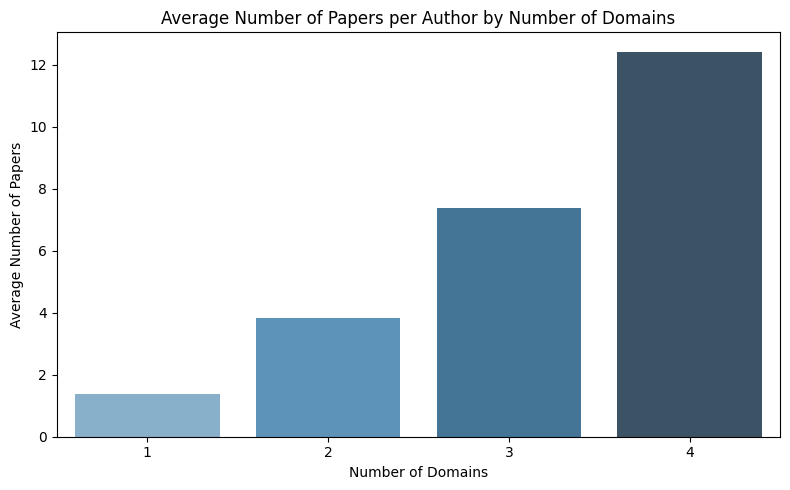

In [ ]:
avg_papers = df_authors.groupby('num_domains')['num_papers'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='num_domains', y='num_papers', data=avg_papers, palette='Blues_d')

plt.title('Average Number of Papers per Author by Number of Domains')
plt.xlabel('Number of Domains')
plt.ylabel('Average Number of Papers')
plt.tight_layout()
plt.show()


### Utrecht data

In [ ]:
df_authors_exploded_utrecht = pd.read_parquet("df_exploded_authors_Utrecht_2024.parquet")
print(df_authors_exploded_utrecht.head(5))

                                    Work Name  Publication Year  \
2  Maslach Burnout Inventory – General Survey              2024   
2  Maslach Burnout Inventory – General Survey              2024   
2  Maslach Burnout Inventory – General Survey              2024   
2  Maslach Burnout Inventory – General Survey              2024   
2  Maslach Burnout Inventory – General Survey              2024   

                                             Authors  \
2  Leon T. De Beer, Leoni van der Vaart, Maximili...   
2  Leon T. De Beer, Leoni van der Vaart, Maximili...   
2  Leon T. De Beer, Leoni van der Vaart, Maximili...   
2  Leon T. De Beer, Leoni van der Vaart, Maximili...   
2  Leon T. De Beer, Leoni van der Vaart, Maximili...   

                                  Primary Topic                    Subfield  \
2  Healthcare professionals’ stress and burnout  General Health Professions   
2  Healthcare professionals’ stress and burnout  General Health Professions   
2  Healthcare professio

In [ ]:
# Step 1: Join df_authors with df_exploded on the 'author' column
df_merged_utrecht = df_authors_utrecht.merge(df_authors_exploded_utrecht[['author', 'Domain']], on='author', how='left')
#print(df_merged_utrecht)
# Step 2: Group by author and aggregate the list of unique domains
df_author_domains_utrecht = df_merged_utrecht.groupby('author')['Domain'].apply(
    lambda x: sorted(set(x.dropna()))
).reset_index()

# Step 3: Merge the aggregated domains back into df_authors
df_authors_utrecht = df_authors_utrecht.merge(df_author_domains_utrecht, on='author', how='left')

print(df_authors_utrecht)


                   author                              mean_embeddings_nomic  \
0      A B M Rijkenhuizen  [-0.0064158333, 0.02790583, -0.0097480975, -0....   
1            A Bernasconi  [-0.0045420723, 0.015402608, -0.025891326, -0....   
2         A Hedvig Arnamo  [0.0026844738, -0.027573867, -0.009876751, -0....   
3                  A Hill  [0.007516788, 0.017663507, -0.0282996, -0.0014...   
4                 A Jurke  [0.0196273, -0.036442235, -0.025137855, -0.038...   
...                   ...                                                ...   
26521     Елизавета Сивак  [-0.031283285, 0.053455167, -0.032539245, -0.0...   
26522    Оlga V. Safonova  [0.040794615, 0.068605915, -0.0050922553, -0.0...   
26523      Т. Е. Морозова  [0.0010946129, -0.036175147, -0.024671901, -0....   
26524     Ṣẹ̀yẹ Abímbọ́lá  [0.037911247, 0.010531769, -0.02444223, -0.046...   
26525        ‎Berend Snel  [-0.006326682, 0.01977542, -0.025662798, -0.00...   

       num_papers  x_authors_nomic  y_a

In [ ]:
# Filter authors with more than one domain
authors_multiple_domains_utrecht = df_authors_utrecht[df_authors_utrecht['Domain'].apply(lambda x: isinstance(x, list) and len(x) > 3)]
print(authors_multiple_domains_utrecht.shape)
print(authors_multiple_domains_utrecht)

(40, 6)
                             author  \
770       Alexandre M. J. J. Bonvin   
1542                      Anke Huss   
1636             Anna M.G. Pasmooij   
1819         Annelien L. Bredenoord   
2214                     Arie Staal   
2337                 Arthur Oldeman   
3511                      Calvin Ge   
4220           Christian P. Janssen   
4507                Claudia Wieners   
5571           Diederick E. Grobbee   
8894                Hanna Hauptmann   
8984                  Hans Kromhout   
9231           Helena M. Verkooijen   
9241            Helga Gardarsdóttir   
9992                Ioannis Basinas   
10042             Irene Monasterolo   
10098             Iris M. Engelhard   
10496            Jack J. Middelburg   
11193       Jenneke van Ditzhuijzen   
11770                 Johan Garssen   
12617                Julian Frommel   
13341    Kerstin Klipstein‐Grobusch   
14326             Lidwien A.M. Smit   
14756              Lourens T. Bloem   
15006            

In [ ]:
df_authors_utrecht['num_domains'] = df_authors_utrecht['Domain'].apply(lambda x: len(x) if isinstance(x, list) else 0)

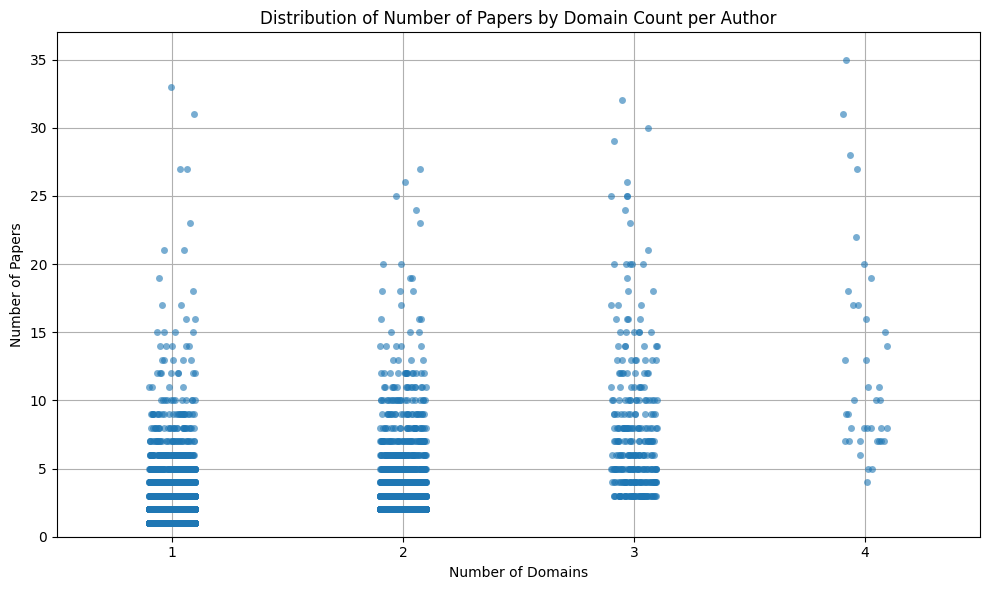

In [ ]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='num_domains', y='num_papers', data=df_authors_utrecht, jitter=True, alpha=0.6)

plt.title('Distribution of Number of Papers by Domain Count per Author')
plt.xlabel('Number of Domains')
plt.ylabel('Number of Papers')
plt.ylim(0, 37)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\alba.garcia.romo\AppData\Local\Temp\ipykernel_6404\1539299595.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='num_domains', y='num_papers', data=avg_papers, palette='Blues_d')


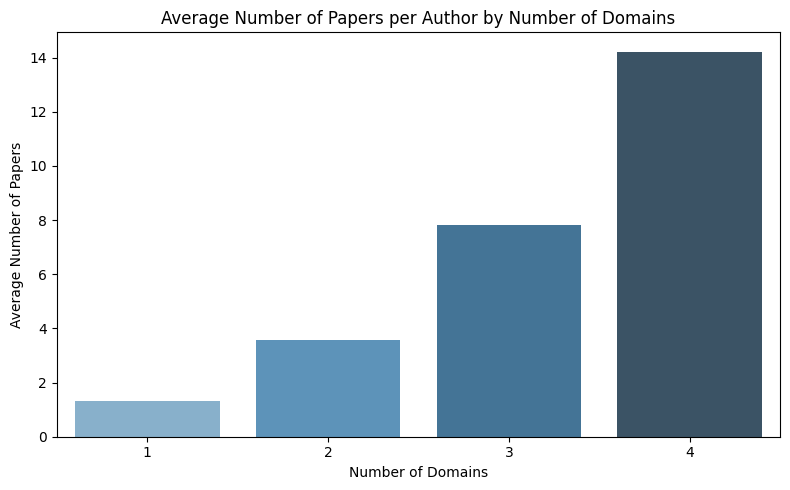

In [ ]:
avg_papers = df_authors_utrecht.groupby('num_domains')['num_papers'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='num_domains', y='num_papers', data=avg_papers, palette='Blues_d')

plt.title('Average Number of Papers per Author by Number of Domains')
plt.xlabel('Number of Domains')
plt.ylabel('Average Number of Papers')
plt.tight_layout()
plt.show()

In [ ]:
df_authors.to_pickle("df_authors_embeddings_UB_2024.pkl")
df_authors_utrecht.to_parquet("df_authors_embeddings_Utrecht_2024.parquet")

# Joint visualization

- UB and Utrecht Nomic embeddings -> already computed, they are the same shape (768)
- Concatenate embeedings and apply UMAP to all
- Recompute mean author embeddings with UB + utrecht works
- Transform with UMAP reducer
- Visualize

In [6]:
print(df_works) #df UB

                                              Work Name  Publication Year  \
0                            Review of Particle Physics              2024   
1     A biological definition of neuronal α-synuclei...              2024   
2     GWTC-2.1: Deep extended catalog of compact bin...              2024   
3         Robustness and resilience of complex networks              2024   
4         The search for neutrinoless double-beta decay              2024   
...                                                 ...               ...   
7873  Inkjet Printed Perovskite LEDs: Approaches, Li...              2024   
7874  Inkjet-printed FASnI3 photodetectors for flexi...              2024   
7875  Effect of annealing temperature on the propert...              2024   
7876  Nickel-manganese based anodes for efficient el...              2024   
7877  OR30-01 Brown Adipose Tissue as an Endocrine O...              2024   

                                                Authors  \
0     S. Navas, 

In [7]:
print(df_works_utrecht) #df Utrecht

                                              Work Name  Publication Year  \
0     Minimal information for studies of extracellul...              2024   
1     TRIPOD+AI statement: updated guidance for repo...              2024   
2            Maslach Burnout Inventory – General Survey              2024   
3     Maddison‐style estimates of the evolution of t...              2024   
4      Critical transitions in the Amazon forest system              2024   
...                                                 ...               ...   
7266  Postsecular Italy: Transnational and Interdisc...              2024   
7267                             Aan alle goede dingen…              2024   
7268               Love and the natural order of things              2024   
7269  Open uitnodiging om oudere, moderne en contemp...              2024   
7270                      Een terugblik op de MVN-reeks              2024   

                                                Authors  \
0     Joshua A W

In [8]:
# Nomic WORK embeddings for UB
works_embeddings_nomic = np.stack(df_works['embeddings_nomic'].values)
# print(works_embeddings_nomic)
print(works_embeddings_nomic.shape)

(7878, 768)


In [9]:
# Nomic WORk embeddings for Utrecht
works_embeddings_utrecht = np.stack(df_works_utrecht['embeddings_nomic'].values)
# print(works_embeddings_utrecht)
print(works_embeddings_utrecht.shape)

(7271, 768)


## New UMAP reducer with all works

In [10]:
# concatenate work embeddings
all_work_embeddings = np.concatenate([works_embeddings_nomic, works_embeddings_utrecht], axis=0)
labels = np.array(['UB'] * len(works_embeddings_nomic) + ['Utrecht'] * len(works_embeddings_utrecht))

print(all_work_embeddings.shape)

(15149, 768)


In [11]:
# apply UMAP to all work embeddings
reducer_umap_all, data_map_all = create_data_map(15, 0.1, all_work_embeddings)
print(reducer_umap_all)
print(data_map_all)

c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP(n_jobs=1, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})
[[3.5984697  2.2177403 ]
 [6.986292   7.8063865 ]
 [3.5157197  1.6687263 ]
 ...
 [8.04367    1.6709776 ]
 [9.260926   0.27040234]
 [9.277726   0.2413375 ]]


In [12]:
df_works_combined = pd.concat([df_works, df_works_utrecht], ignore_index=True)
print(df_works_combined)

                                               Work Name  Publication Year  \
0                             Review of Particle Physics              2024   
1      A biological definition of neuronal α-synuclei...              2024   
2      GWTC-2.1: Deep extended catalog of compact bin...              2024   
3          Robustness and resilience of complex networks              2024   
4          The search for neutrinoless double-beta decay              2024   
...                                                  ...               ...   
15144  Postsecular Italy: Transnational and Interdisc...              2024   
15145                             Aan alle goede dingen…              2024   
15146               Love and the natural order of things              2024   
15147  Open uitnodiging om oudere, moderne en contemp...              2024   
15148                      Een terugblik op de MVN-reeks              2024   

                                                 Authors  \
0  

In [13]:
utils.save_coordinates(df_works_combined, data_map_all, 'nomic_combined')

                                           Work Name  Publication Year  \
0                         Review of Particle Physics              2024   
1  A biological definition of neuronal α-synuclei...              2024   

                                             Authors  \
0  S. Navas, C. Amsler, Th. Gutsche, C. Hanhart, ...   
1  Tanya Simuni, Lana M. Chahine, Kathleen L. Pos...   

                                   Primary Topic  \
0               Dark Matter and Cosmic Phenomena   
1  Parkinson's Disease Mechanisms and Treatments   

                          Subfield                  Field             Domain  \
0  Nuclear and High Energy Physics  Physics and Astronomy  Physical Sciences   
1                        Neurology               Medicine    Health Sciences   

                                            Abstract      x_st      y_st  \
0  The summarizes much of particle physics and co...  7.533049  6.643386   
1                                        no abstract -0.42

## New joint exploded df for authors

In [93]:
df_exploded_combined = utils.create_exploded_authors_df(df_works_combined) # filtered paper by <= 20 authors already applied
print(df_exploded_combined)

                                       Work Name  Publication Year  \
3  Robustness and resilience of complex networks              2024   
3  Robustness and resilience of complex networks              2024   
3  Robustness and resilience of complex networks              2024   
3  Robustness and resilience of complex networks              2024   
3  Robustness and resilience of complex networks              2024   
3  Robustness and resilience of complex networks              2024   
3  Robustness and resilience of complex networks              2024   
3  Robustness and resilience of complex networks              2024   
4  The search for neutrinoless double-beta decay              2024   
4  The search for neutrinoless double-beta decay              2024   

                                             Authors  \
3  Oriol Artime, Marco Grassia, Manlio De Domenic...   
3  Oriol Artime, Marco Grassia, Manlio De Domenic...   
3  Oriol Artime, Marco Grassia, Manlio De Domenic...   
3  Or

In [15]:
# Compute mean embedding for authors - nomic model
embedding_cols = ['embeddings_nomic']

df_authors_combined = utils.compute_mean_embeddings_by_author(df_exploded_combined, embedding_cols)
print(df_authors_combined)

KeyboardInterrupt: 

In [ ]:
# add label of institution to author
# Extract sets of authors from each df
ub_authors = set(df_works['Authors'].str.split(',').explode().str.strip().dropna())
utrecht_authors = set(df_works_utrecht['Authors'].str.split(',').explode().str.strip().dropna())

def label_institution(author):
    in_ub = author in ub_authors
    in_utrecht = author in utrecht_authors
    if in_ub and in_utrecht:
        return "Both"
    elif in_ub:
        return "UB"
    elif in_utrecht:
        return "Utrecht"
    else:
        return "Unknown"

df_authors_combined['institution'] = df_authors_combined['author'].apply(label_institution)
print(df_authors_combined)


                       author  \
0          A B M Rijkenhuizen   
1                   A Bellido   
2                    A Bernal   
3                A Bernasconi   
4               A Boncompagni   
...                       ...   
55217            ‎Berend Snel   
55218  ‪Aurelio Gómez‐Cadenas   
55219          ‪Damià Barceló   
55220        ‪Frederic Blanc‬   
55221       ‪Moreah Zisquit‬‏   

                                   mean_embeddings_nomic  num_papers  \
0      [-0.0064158333, 0.02790583, -0.0097480975, -0....           1   
1      [0.030011391, 0.01821812, -0.03136764, -0.0002...           2   
2      [-0.01001405, 0.013115305, -0.0035099105, 0.01...           1   
3      [-0.0045420723, 0.015402608, -0.025891326, -0....           1   
4      [0.011845273, 0.076240845, -0.009984425, 0.004...           1   
...                                                  ...         ...   
55217  [-0.006326682, 0.01977542, -0.025662798, -0.00...           4   
55218  [0.041966096, -0.037

C:\Users\alba.garcia.romo\AppData\Local\Temp\ipykernel_34180\3485950248.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=institution_counts, x='institution', y='count', palette='Set2')


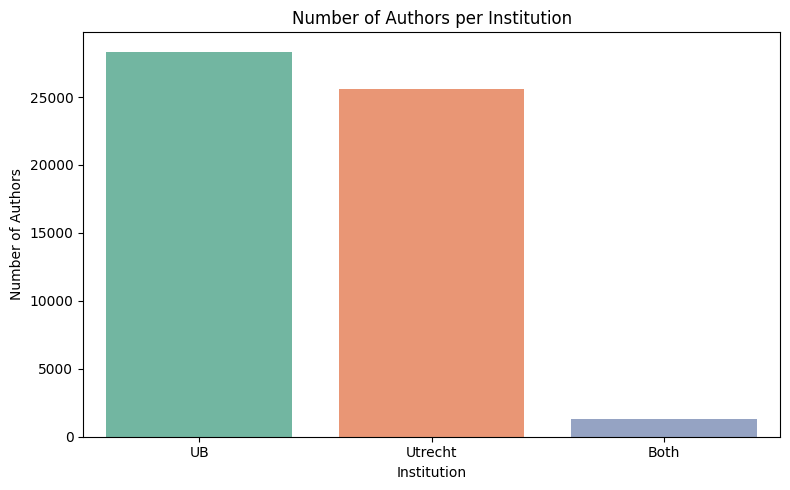

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count number of authors per institution
institution_counts = df_authors_combined['institution'].value_counts().reset_index()
institution_counts.columns = ['institution', 'count']

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=institution_counts, x='institution', y='count', palette='Set2')

plt.title('Number of Authors per Institution')
plt.xlabel('Institution')
plt.ylabel('Number of Authors')
plt.tight_layout()
plt.show()


## Apply UMAP reducer to authors jointly

We both apply:
- The UMAP redecuer trained on the joint works (*reducer_umap_all*)
- A new UMAP reducer trained on the average author embeddings

In [ ]:
all_authors_embeddings_nomic = np.stack(df_authors_combined['mean_embeddings_nomic'].values)
all_authors_data_map_nomic = reducer_umap_all.transform(all_authors_embeddings_nomic)
print(all_authors_data_map_nomic)

c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[[ 6.2466693  5.8648696]
 [10.340052   8.210633 ]
 [ 7.0704675  8.950525 ]
 ...
 [ 5.044523   4.4431357]
 [10.304321   6.4859967]
 [ 9.726238   4.5900183]]


In [ ]:
utils.save_coordinates(df_authors_combined, all_authors_data_map_nomic, 'authors_nomic')

               author                              mean_embeddings_nomic  \
0  A B M Rijkenhuizen  [-0.0064158333, 0.02790583, -0.0097480975, -0....   
1           A Bellido  [0.030011391, 0.01821812, -0.03136764, -0.0002...   

   num_papers institution  x_authors_nomic  y_authors_nomic  
0           1     Utrecht         6.246669         5.864870  
1           2          UB        10.340052         8.210633  
(55222, 6)


In [ ]:
df_authors_combined.to_pickle("df_authors_embeddings_UB_and_Utrecht_2024.pkl")
df_works_combined.to_pickle("df_works_embeddings_UB_and_Utrecht_2024.pkl")

In [88]:
all_authors_embeddings_nomic = np.stack(df_authors_combined['mean_embeddings_nomic'].values)
reducer_umap_all_authors, data_map_all_authors = create_data_map(15, 0.1, all_authors_embeddings_nomic)
utils.save_coordinates(df_authors_combined, data_map_all_authors, 'authors_alone_nomic')

               author                              mean_embeddings_nomic  \
0  A B M Rijkenhuizen  [-0.0064158333, 0.02790583, -0.0097480975, -0....   
1           A Bellido  [0.030011391, 0.01821812, -0.03136764, -0.0002...   

   num_papers institution  x_authors_nomic  y_authors_nomic  \
0           1     Utrecht         6.246669         5.864870   
1           2          UB        10.340052         8.210633   

              Domain  x_authors_alone_nomic  y_authors_alone_nomic  
0  [Health Sciences]               4.062103              10.479340  
1  [Health Sciences]              15.739731               8.550876  
(55222, 9)


In [90]:
df_authors_combined = pd.read_pickle("df_authors_embeddings_UB_and_Utrecht_2024.pkl")
df_works_combined  = pd.read_pickle("df_works_embeddings_UB_and_Utrecht_2024.pkl")

In [91]:
print(df_authors_combined)
#print(df_works_combined)

                       author  \
0          A B M Rijkenhuizen   
1                   A Bellido   
2                    A Bernal   
3                A Bernasconi   
4               A Boncompagni   
...                       ...   
55217            ‎Berend Snel   
55218  ‪Aurelio Gómez‐Cadenas   
55219          ‪Damià Barceló   
55220        ‪Frederic Blanc‬   
55221       ‪Moreah Zisquit‬‏   

                                   mean_embeddings_nomic  num_papers  \
0      [-0.0064158333, 0.02790583, -0.0097480975, -0....           1   
1      [0.030011391, 0.01821812, -0.03136764, -0.0002...           2   
2      [-0.01001405, 0.013115305, -0.0035099105, 0.01...           1   
3      [-0.0045420723, 0.015402608, -0.025891326, -0....           1   
4      [0.011845273, 0.076240845, -0.009984425, 0.004...           1   
...                                                  ...         ...   
55217  [-0.006326682, 0.01977542, -0.025662798, -0.00...           4   
55218  [0.041966096, -0.037

## Visualization

In [30]:
# concatenate main works df
df_works['institution'] = 'UB'
df_works_utrecht['institution'] = 'Utrecht'
df_works_all = pd.concat([df_works, df_works_utrecht], ignore_index=True)
print(df_works_all)

                                               Work Name  Publication Year  \
0                             Review of Particle Physics              2024   
1      A biological definition of neuronal α-synuclei...              2024   
2      GWTC-2.1: Deep extended catalog of compact bin...              2024   
3          Robustness and resilience of complex networks              2024   
4          The search for neutrinoless double-beta decay              2024   
...                                                  ...               ...   
15144  Postsecular Italy: Transnational and Interdisc...              2024   
15145                             Aan alle goede dingen…              2024   
15146               Love and the natural order of things              2024   
15147  Open uitnodiging om oudere, moderne en contemp...              2024   
15148                      Een terugblik op de MVN-reeks              2024   

                                                 Authors  \
0  

In [26]:
print(df_authors_combined.columns)

Index(['author', 'mean_embeddings_nomic', 'num_papers', 'institution',
       'x_authors_nomic', 'y_authors_nomic'],
      dtype='object')


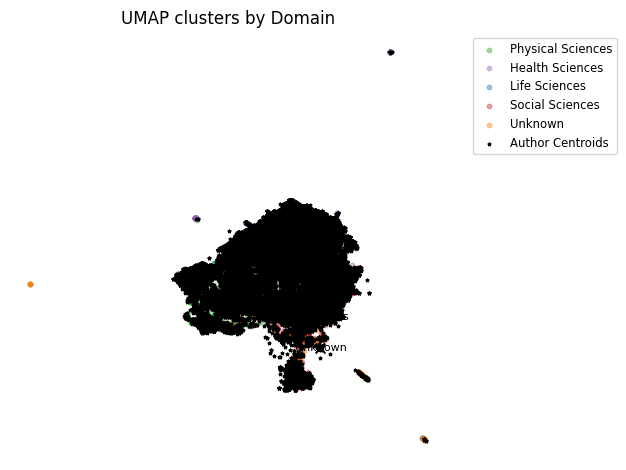

label  count  centroid_x  centroid_y  avg_dist   std_dev
3    Social Sciences   3283    8.580993    2.538093  2.206508  1.415756
2      Life Sciences   2283    6.760915    6.595782  2.272732  1.452619
1    Health Sciences   5161    8.341899    7.334242  2.287168  1.926082
0  Physical Sciences   4229    5.327065    3.992766  2.345511  1.664103
4            Unknown    193    9.299479    0.316665  3.193630  3.552499

In [23]:
compute_cluster_spread(
    df=df_works_combined,
    x_col='x_nomic_combined',
    y_col='y_nomic_combined',
    x_col_auth='x_authors_nomic',
    y_col_auth='y_authors_nomic',
    label_col='Domain',
    plot=True,
    author_centroids=df_authors_combined
)

In [37]:
print(df_authors_combined.shape)
print(major_authors.shape)

(55222, 6)
(15296, 6)


                       author  \
1                   A Bellido   
13                  A Fidanza   
23              A M Corraliza   
24            A M Torres-Vega   
25                     A Maio   
...                       ...   
55206           Л. В. Рычкова   
55212          Олена Ніфатова   
55213  Павел В. Дороватовский   
55215        Тамара Меркулова   
55217            ‎Berend Snel   

                                   mean_embeddings_nomic  num_papers  \
1      [0.030011391, 0.01821812, -0.03136764, -0.0002...           2   
13     [-0.0055297315, 0.032070618, -0.02178782, -0.0...           6   
23     [0.0012504562, 0.00086196465, -0.006151247, -0...           2   
24     [-0.00090993545, -0.020861933, -0.029907133, -...           2   
25     [-0.0015457969, 0.0063639563, -0.022561528, -0...           2   
...                                                  ...         ...   
55206  [0.011684284, 0.014683731, -0.021913836, -0.00...           2   
55212  [-0.008137666, 0.054

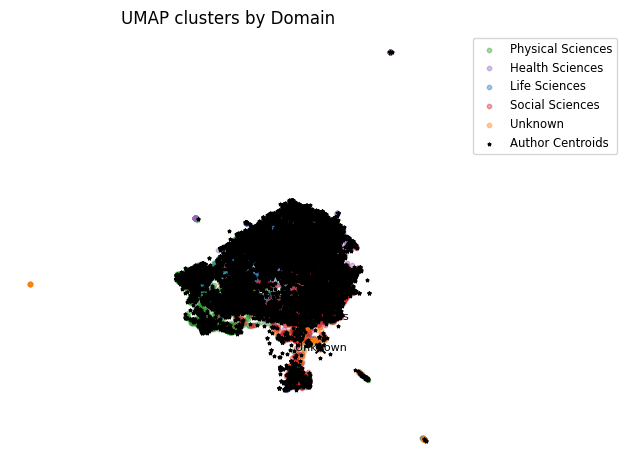

label  count  centroid_x  centroid_y  avg_dist   std_dev
3    Social Sciences   3283    8.580993    2.538093  2.206508  1.415756
2      Life Sciences   2283    6.760915    6.595782  2.272732  1.452619
1    Health Sciences   5161    8.341899    7.334242  2.287168  1.926082
0  Physical Sciences   4229    5.327065    3.992766  2.345511  1.664103
4            Unknown    193    9.299479    0.316665  3.193630  3.552499

In [34]:
major_authors = df_authors_combined[df_authors_combined['num_papers'] >= 2]
print(major_authors)

compute_cluster_spread(
    df=df_works_combined,
    x_col='x_nomic_combined',
    y_col='y_nomic_combined',
    x_col_auth='x_authors_nomic',
    y_col_auth='y_authors_nomic',
    label_col='Domain',
    plot=True,
    author_centroids=major_authors
)


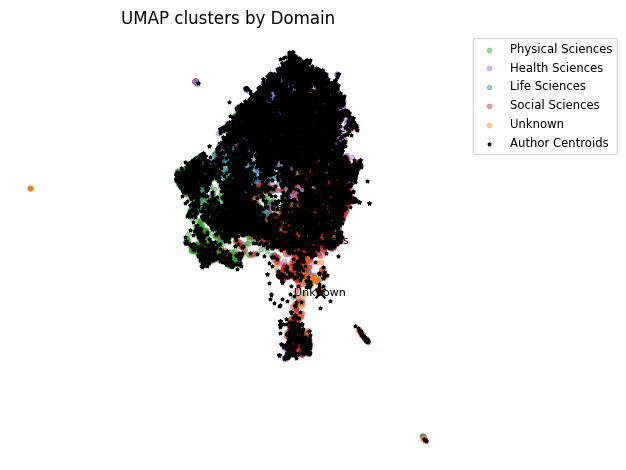

label  count  centroid_x  centroid_y  avg_dist   std_dev
3    Social Sciences   3283    8.580993    2.538093  2.206508  1.415756
1    Health Sciences   5139    8.322925    7.273273  2.241227  1.731935
2      Life Sciences   2281    6.755641    6.582648  2.261436  1.392491
0  Physical Sciences   4223    5.316477    3.967789  2.319231  1.544298
4            Unknown    192    9.281376    0.205940  3.121721  3.280824

In [50]:
df_all_works_filtered = df_works_combined[df_works_combined['y_nomic_combined'] <= 19]
df_all_authors_filtered = major_authors[major_authors['y_authors_nomic'] <= 19]

compute_cluster_spread(
    df=df_all_works_filtered,
    x_col='x_nomic_combined',
    y_col='y_nomic_combined',
    x_col_auth='x_authors_nomic',
    y_col_auth='y_authors_nomic',
    label_col='Domain',
    plot=True,
    author_centroids=df_all_authors_filtered
)


## Interactive visualization

In [97]:
# extract domains from works to assign to authors

# Step 1: Join df_authors with df_exploded on the 'author' column
df_merged_combined = df_authors_combined.merge(df_exploded_combined[['author', 'Domain']], on='author', how='left')
print(df_merged_combined)
# Step 2: Group by author and aggregate the list of unique domains
df_author_domains_combined = df_merged_combined.groupby('author')['Domain'].apply(
    lambda x: sorted(set(x.dropna()))
).reset_index()

# Step 3: Merge the aggregated domains back into df_authors
df_authors_combined = df_authors_combined.merge(df_author_domains_combined, on='author', how='left')

print(df_authors_combined)

                       author  \
0          A B M Rijkenhuizen   
1                   A Bellido   
2                   A Bellido   
3                    A Bernal   
4                A Bernasconi   
...                       ...   
89990            ‎Berend Snel   
89991  ‪Aurelio Gómez‐Cadenas   
89992          ‪Damià Barceló   
89993        ‪Frederic Blanc‬   
89994       ‪Moreah Zisquit‬‏   

                                   mean_embeddings_nomic  num_papers  \
0      [-0.0064158333, 0.02790583, -0.0097480975, -0....           1   
1      [0.030011391, 0.01821812, -0.03136764, -0.0002...           2   
2      [0.030011391, 0.01821812, -0.03136764, -0.0002...           2   
3      [-0.01001405, 0.013115305, -0.0035099105, 0.01...           1   
4      [-0.0045420723, 0.015402608, -0.025891326, -0....           1   
...                                                  ...         ...   
89990  [-0.006326682, 0.01977542, -0.025662798, -0.00...           4   
89991  [0.041966096, -0.037

In [98]:
df_authors_combined.columns

Index(['author', 'mean_embeddings_nomic', 'num_papers', 'institution',
       'x_authors_nomic', 'y_authors_nomic', 'Domain', 'x_authors_alone_nomic',
       'y_authors_alone_nomic', 'Domain_y'],
      dtype='object')

In [99]:
df_authors_combined.to_pickle("df_authors_embeddings_UB_and_Utrecht_2024.pkl")

In [2]:
df_authors_combined = pd.read_pickle("df_authors_embeddings_UB_and_Utrecht_2024.pkl")

In [100]:
df_authors_combined_clean = df_authors_combined.copy()

for col in df_authors_combined_clean.columns:
    df_authors_combined_clean[col] = df_authors_combined_clean[col].apply(
        lambda x: x.tolist() if isinstance(x, np.ndarray) else x
    )
print(df_authors_combined_clean)

                       author  \
0          A B M Rijkenhuizen   
1                   A Bellido   
2                    A Bernal   
3                A Bernasconi   
4               A Boncompagni   
...                       ...   
55217            ‎Berend Snel   
55218  ‪Aurelio Gómez‐Cadenas   
55219          ‪Damià Barceló   
55220        ‪Frederic Blanc‬   
55221       ‪Moreah Zisquit‬‏   

                                   mean_embeddings_nomic  num_papers  \
0      [-0.006415833253413439, 0.02790582925081253, -...           1   
1      [0.030011391267180443, 0.01821812056005001, -0...           2   
2      [-0.010014049708843231, 0.013115305453538895, ...           1   
3      [-0.004542072303593159, 0.01540260761976242, -...           1   
4      [0.011845272965729237, 0.07624084502458572, -0...           1   
...                                                  ...         ...   
55217  [-0.006326681934297085, 0.019775420427322388, ...           4   
55218  [0.04196609556674957

In [101]:
df_minimal = df_authors_combined_clean.drop(columns=['mean_embeddings_nomic'])
print(df_minimal)

                       author  num_papers institution  x_authors_nomic  \
0          A B M Rijkenhuizen           1     Utrecht         6.246669   
1                   A Bellido           2          UB        10.340052   
2                    A Bernal           1          UB         7.070467   
3                A Bernasconi           1     Utrecht         9.338890   
4               A Boncompagni           1          UB         9.909717   
...                       ...         ...         ...              ...   
55217            ‎Berend Snel           4     Utrecht         5.480303   
55218  ‪Aurelio Gómez‐Cadenas           1          UB         5.436807   
55219          ‪Damià Barceló           1          UB         5.044523   
55220        ‪Frederic Blanc‬           1          UB        10.304321   
55221       ‪Moreah Zisquit‬‏           1          UB         9.726238   

       y_authors_nomic               Domain  x_authors_alone_nomic  \
0             5.864870    [Health Science

In [5]:
import numpy as np
import datamapplot

def create_author_datamapplot(df, model_name, n_neighbors):

    coords = df[[f"x_authors_{model_name}", f"y_authors_{model_name}"]].values
    university_labels = np.array(df['institution'].astype(str).tolist())

    # Domain filter
    domains = np.array([", ".join(d) if isinstance(d, list) else str(d) for d in df['Domain'].tolist()])

    hover_text = np.array(df['author'].astype(str).tolist())

    # enrich hover data
    hover_text_template = """
    <div style="font-size:10pt; padding:2px;">
        <strong>{author}</strong><br>
        Number of papers: {num_papers}
    </div>
    """
    
    # 3. Create the plot
    plot = datamapplot.create_interactive_plot(
        coords,
        domains,
        # university_labels,              # Should be a list/array of same length as data_map
        hover_text=hover_text,   # Should be a list of strings or None
        #extra_point_data=hover_data,
        hover_text_html_template=hover_text_template,
        extra_point_data=df,
        initial_zoom_fraction=0.95,
        font_family="Playfair Display SC",
        title="Author Landscape",              # Make sure this is a string!
        sub_title="UB vs Utrecht University",  # Also a string
        on_click="window.open(`http://google.com/search?q=\"{hover_text}\"`)",
        enable_search=True,
        darkmode=True,
        histogram_data=university_labels,
        histogram_n_bins=len(set(university_labels)),
        histogram_settings={
            "histogram_title": "Institution",
            "histogram_width": 200,
            "histogram_height": 150,
            "histogram_log_scale": False,
            "histogram_bin_fill_color": "#6baed6",
            "histogram_bin_selected_fill_color": "#2171b5",
            "histogram_bin_unselected_fill_color": "#c6dbef"
            }
    )

    plot.save(f"TEST_UB_vs_Utrecht_authors_{model_name}_{n_neighbors}_other.html")
    return plot

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import datamapplot
from matplotlib.colors import rgb2hex

def create_author_datamapplot_2(df, model_name, n_neighbors):
    coords = df[[f"x_authors_{model_name}", f"y_authors_{model_name}"]].values

    # Label for histogram and filter/search
    domain_labels = np.array([", ".join(d) if isinstance(d, list) else str(d) for d in df['Domain'].tolist()])

    # Label used for coloring
    university_labels = np.array(df['institution'].astype(str).tolist())

    # === Define color mapping ===
    color_mapping = {
        "UB": "#2a8bb4",       # Blue
        "Utrecht": "#d62728",  # Red
        "Both": "#ffdd57"      # Yellow
    }

    # Create marker_color_array
    marker_color_array = pd.Series(university_labels).map(color_mapping).fillna("#cccccc").values

    # Hover text
    hover_text = np.array(df['author'].astype(str).tolist())
    hover_text_template = """
    <div style="font-size:10pt; padding:2px;">
        <strong>{author}</strong><br>
        Number of papers: {num_papers}
    </div>
    """

    # === Create custom legend HTML & CSS ===
    custom_css = custom_css = """
    #legend {
        position: absolute;
        top: 200px;
        left: 28px;
        z-index: 2;
        padding: 10px 14px;
        border: 1px solid #ccc;
        border-radius: 6px;
        font-family: sans-serif;
        font-size: 14px;
        box-shadow: 0px 2px 6px rgba(0, 0, 0, 0.15);
    }

    #legend-title {
        font-weight: bold;
        font-size: 15px;
        margin-bottom: 10px;  /* <-- This adds space below the title */
    }

    .row {
        display: flex;
        align-items: center;
        margin-bottom: 6px;
    }

    .box {
        height: 14px;
        width: 14px;
        border-radius: 2px;
        margin-right: 8px;
        background-color: #000;
    }
    """

    custom_html = """
    <div id="legend" class="container-box">
        <div id="legend-title">Institution</div>
    """
    for field, color in color_mapping.items():
        custom_html += f'    <div class="row"><div class="box" style="background-color:{color};"></div>{field}</div>\n'
    custom_html += "</div>"


    # Create the plot
    plot = datamapplot.create_interactive_plot(
        coords,
        domain_labels,                         # Used for filtering/search
        hover_text=hover_text,
        hover_text_html_template=hover_text_template,
        extra_point_data=df,
        initial_zoom_fraction=0.99,
        font_family="Playfair Display SC",
        title="Author Landscape",
        sub_title="UB vs Utrecht University",
        on_click="window.open(`http://google.com/search?q=\"{hover_text}\"`)",
        enable_search=True,
        darkmode=True,
        histogram_data=domain_labels,
        histogram_n_bins=len(set(domain_labels)),
        marker_color_array=marker_color_array,                # Coloring by institution
        histogram_settings={
            "histogram_title": "Primary Domain",
            "histogram_width": 500,
            "histogram_height": 100,
            "histogram_log_scale": False,
            "histogram_bin_fill_color": "#6baed6",
            "histogram_bin_selected_fill_color": "#2171b5",
            "histogram_bin_unselected_fill_color": "#c6dbef"
        },
        custom_css=custom_css,
        custom_html=custom_html,
        color_label_text=False
    )

    plot.save(f"TEST_UB_vs_Utrecht_authors_{model_name}_{n_neighbors}_byInstitution.html")
    return plot


<InteractiveFigure width=100% height=800>
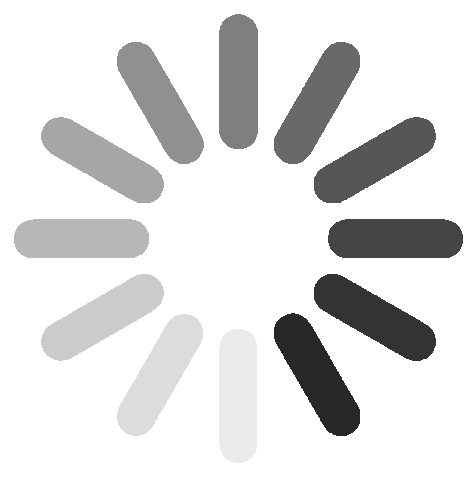

In [82]:
create_author_datamapplot_2(df_minimal, 'nomic', '15')

<InteractiveFigure width=100% height=800>
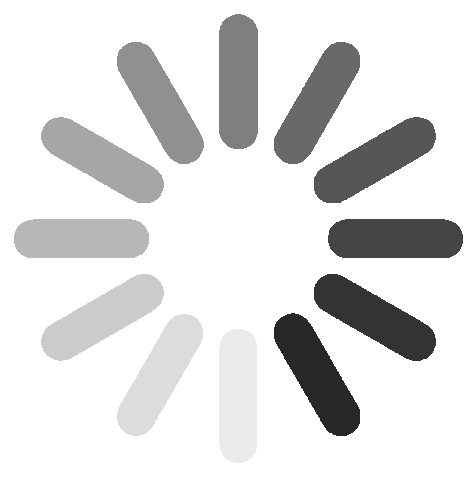

In [102]:
create_author_datamapplot_2(df_minimal, 'alone_nomic', '15')